In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load csv with stations' metadata so we can identify stations' ids:

In [2]:
col_stations = ['province','id','name','longitude','latitude','height','unknown']
stationsID = pd.read_csv('data\ESTACIONES.txt', sep=';', header=None, names=col_stations).drop(columns='unknown')
stationsID

,province,id,name,longitude,latitude,height
0,BARCELONA,1203,BALENYA,2.26,41.85,570
1,BURGOS,9069,MIRANDA DE EBRO,-2.96,42.68,520
2,HUESCA,9489,LA SOTONERA EMBALSE,-0.67,42.11,413
3,NAVARRA,9269,ALSASUA,-2.18,42.89,525
4,NAVARRA,9301,MONTEAGUDO,-1.69,41.96,410
5,SORIA,2030,SORIA 'OBSERVATORIO',-2.48,41.77,1082
6,SORIA,2085,EL BURGO DE OSMA,-3.07,41.59,895
7,TARRAGONA,1017,VILASECA,1.15,41.11,53
8,TARRAGONA,9971,TIVISSA,0.73,41.04,310
9,ZARAGOZA,9390,DAROCA OBSERVATORIO,-1.41,41.11,779


Now we read climate data from different stations into a dictionary and then merge into one Data Frame:

In [3]:
#col_station = ['year','temperature']
station = {}
for id in stationsID['id'].iteritems():
    station[str(id[1])] = pd.read_csv('data/Tmin_'+str(id[1])+'_filled_annual_means.txt', sep='    ',
                                      header=None, names=['year',str(id[1])], engine='python').set_index('year')
stations = pd.concat(station.values(),axis=1)
stations.head()

,1203,9069,9489,9269,9301,2030,2085,1017,9971,9390,9523,9371
year,,,,,,,,,,,,
1956,5.56123,7.92211,7.72084,6.19617,5.82826,1.32384,1.73872,10.1185,8.16141,6.61261,7.91825,4.61540
1957,4.98041,8.63398,8.17260,7.34303,6.66681,1.97370,1.15640,10.5183,8.58456,7.26526,8.30919,5.07892
1958,5.96169,9.97144,9.59621,7.55125,7.41064,3.44861,2.49214,11.9026,9.59260,8.51326,9.41647,6.30164
1959,6.51167,9.87581,9.98493,6.89783,7.44723,4.06046,4.53880,12.6202,9.76165,8.73918,9.45702,6.85304
1960,6.52788,9.61240,9.48082,6.62796,7.30628,3.24076,3.70945,11.9556,9.17480,8.52391,8.87280,6.26711


Now we choose the origin or studied station:

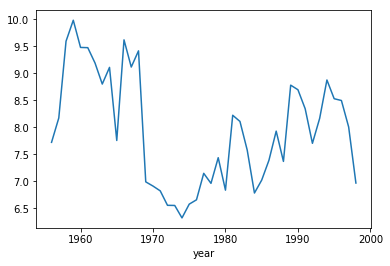

In [7]:
origin = '9489'
stations[origin].plot.line()

Then we have to calculate the difference between years so discontinuities in other series lose weight

In [5]:
ydiff ={}
for col in stations.columns[:]:
    ydiff[col] = stations[col]-stations[col].shift(-1)
yearDiff = pd.concat(ydiff.values(), axis=1)
yearDiff.head()

,1203,9069,9489,9269,9301,2030,2085,1017,9971,9390,9523,9371
year,,,,,,,,,,,,
1956,0.58082,-0.71187,-0.45176,-1.14686,-0.83855,-0.64986,0.58232,-0.3998,-0.42315,-0.65265,-0.39094,-0.46352
1957,-0.98128,-1.33746,-1.42361,-0.20822,-0.74383,-1.47491,-1.33574,-1.3843,-1.00804,-1.24800,-1.10728,-1.22272
1958,-0.54998,0.09563,-0.38872,0.65342,-0.03659,-0.61185,-2.04666,-0.7176,-0.16905,-0.22592,-0.04055,-0.55140
1959,-0.01621,0.26341,0.50411,0.26987,0.14095,0.81970,0.82935,0.6646,0.58685,0.21527,0.58422,0.58593
1960,0.03555,-0.13638,0.00442,0.16148,-0.16299,-0.18554,-0.41630,-0.3034,-0.38831,0.02364,-0.03163,-0.43891


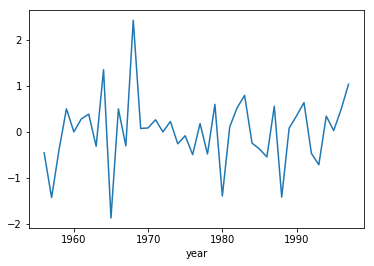

In [8]:
yearDiff[origin].plot.line()

At this point we can look for the stations with the best correlation in the year difference and took the first five:

In [12]:
correlations = yearDiff.corr(method='pearson')
bestSts = correlations[origin][correlations[origin] > 0.35].drop(origin).sort_values(ascending=False).head(5)
bestSts

9390    0.687128
1017    0.663698
1203    0.656498
9371    0.608791
2030    0.542965
Name: 9489, dtype: float64